In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use ('dark_background')

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'


In [4]:
file_path = '../data/banking.csv'
df = pd.read_csv(file_path, sep=',')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [6]:
df = df.drop('duration', axis=1)

In [7]:
numeric_columns = df.select_dtypes(exclude=[np.object_]).columns
df[numeric_columns].head(2)

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0


In [8]:
categorical_columns = df.select_dtypes(include=[np.object_]).columns
df[categorical_columns].head(2)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent


In [9]:
df.describe()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [10]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [11]:
df[numeric_columns].corr()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
campaign,0.004594,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.030399,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


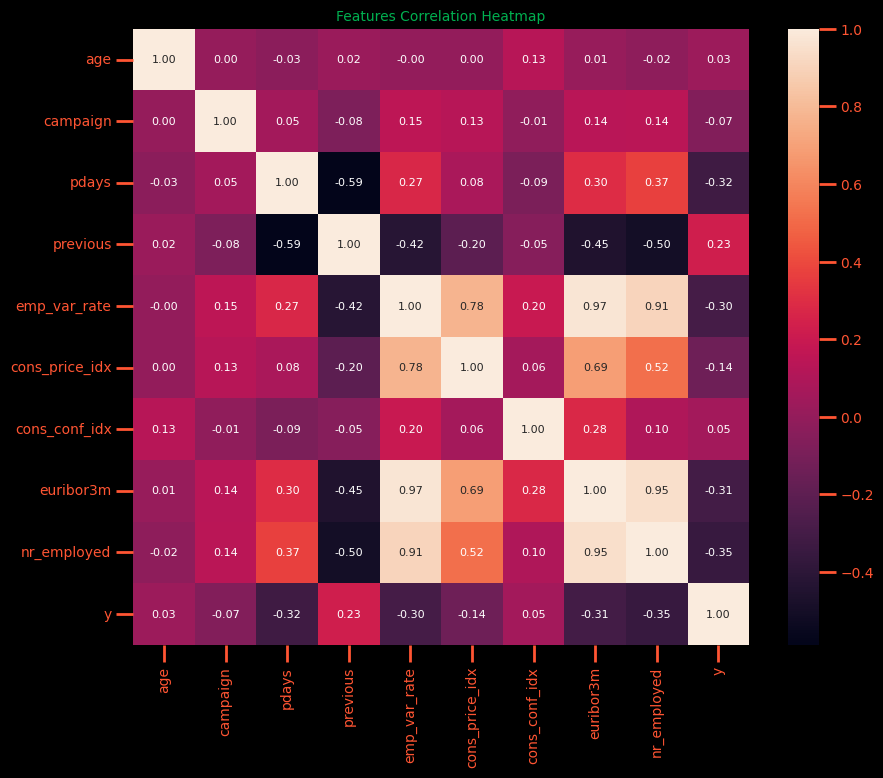

In [12]:
cm = np.corrcoef(df[numeric_columns].values.T)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=numeric_columns, xticklabels=numeric_columns)
plt.title('Features Correlation Heatmap')
plt.show()

In [13]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
top_corr = get_top_abs_correlations(df[numeric_columns], 10).to_frame()
top_corr

Top Absolute Correlations


0
emp_var_rate   euribor3m       0.972245
euribor3m      nr_employed     0.945154
emp_var_rate   nr_employed     0.906970
               cons_price_idx  0.775334
cons_price_idx euribor3m       0.688230
pdays          previous        0.587514
cons_price_idx nr_employed     0.522034
previous       nr_employed     0.501333
               euribor3m       0.454494
               emp_var_rate    0.420489

In [14]:
test = df[numeric_columns].drop(['emp_var_rate', 'euribor3m'], axis=1)
get_top_abs_correlations(test, 10)

pdays           previous          0.587514
cons_price_idx  nr_employed       0.522034
previous        nr_employed       0.501333
pdays           nr_employed       0.372605
nr_employed     y                 0.354678
pdays           y                 0.324914
previous        y                 0.230181
                cons_price_idx    0.203130
campaign        nr_employed       0.144095
cons_price_idx  y                 0.136211
dtype: float64

In [15]:
df = df.drop(columns=['emp_var_rate', 'euribor3m'], axis=1)
numeric_columns = numeric_columns.drop(['emp_var_rate', 'euribor3m'])

In [16]:
### Посмотрим на квазиконстантные признаки

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])

cutter.get_feature_names_out()

array(['age', 'campaign', 'pdays', 'previous', 'cons_price_idx',
       'cons_conf_idx', 'nr_employed'], dtype=object)

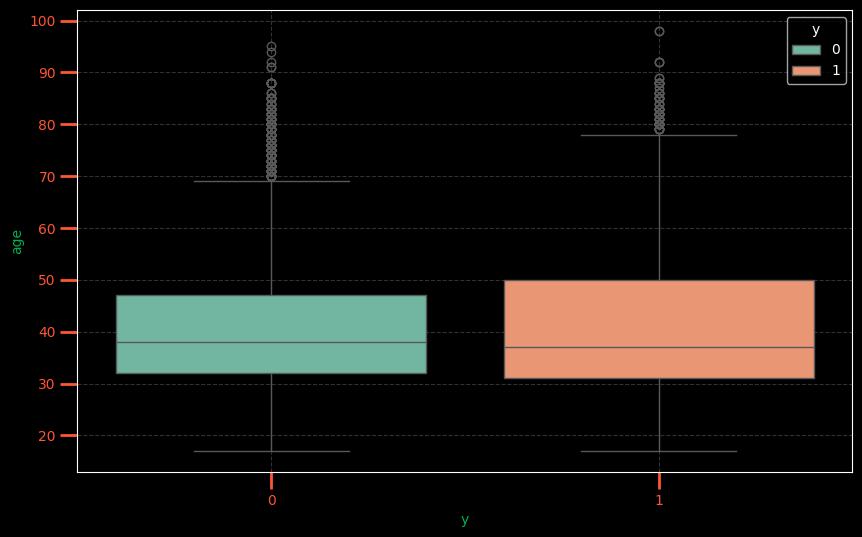

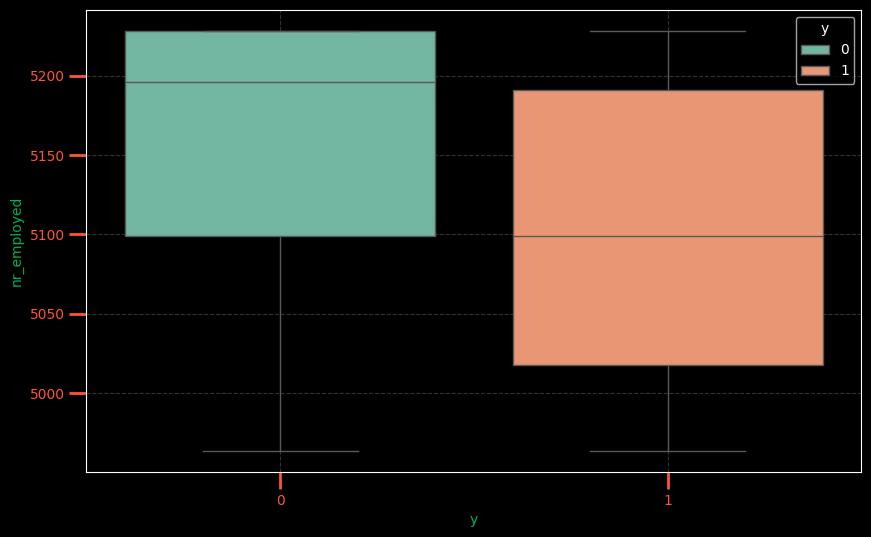

In [17]:
num_col = ['age', 'nr_employed']

for col in num_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=col, x='y', data=df, hue='y', palette='Set2', legend=True) 
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.show()

In [18]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [19]:
df.groupby('marital').size().to_frame()

,0
marital,
divorced,4612
married,24928
single,11568
unknown,80


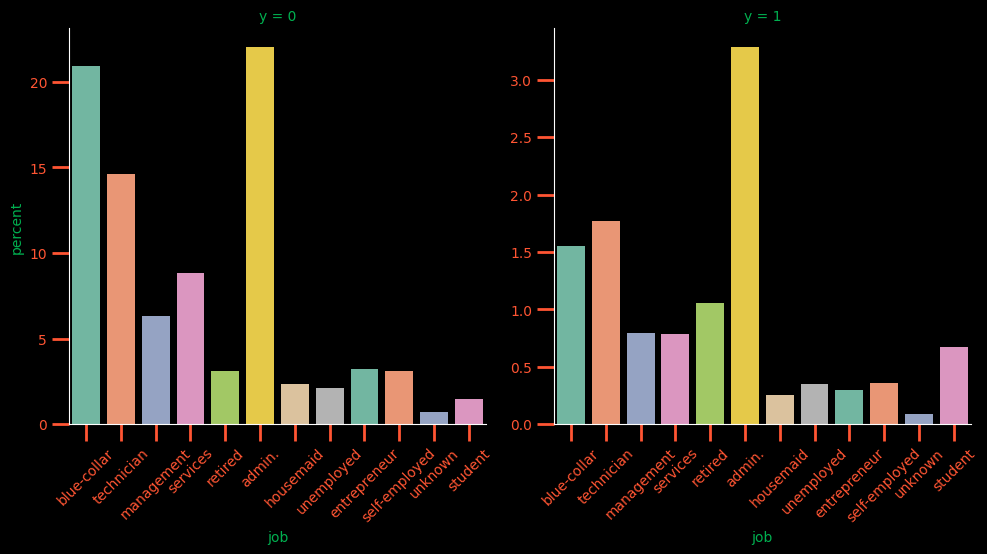

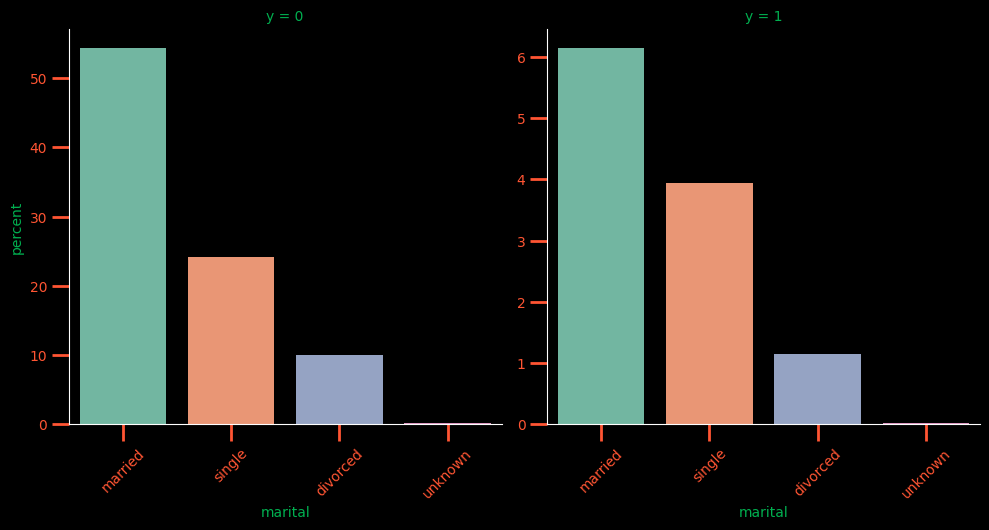

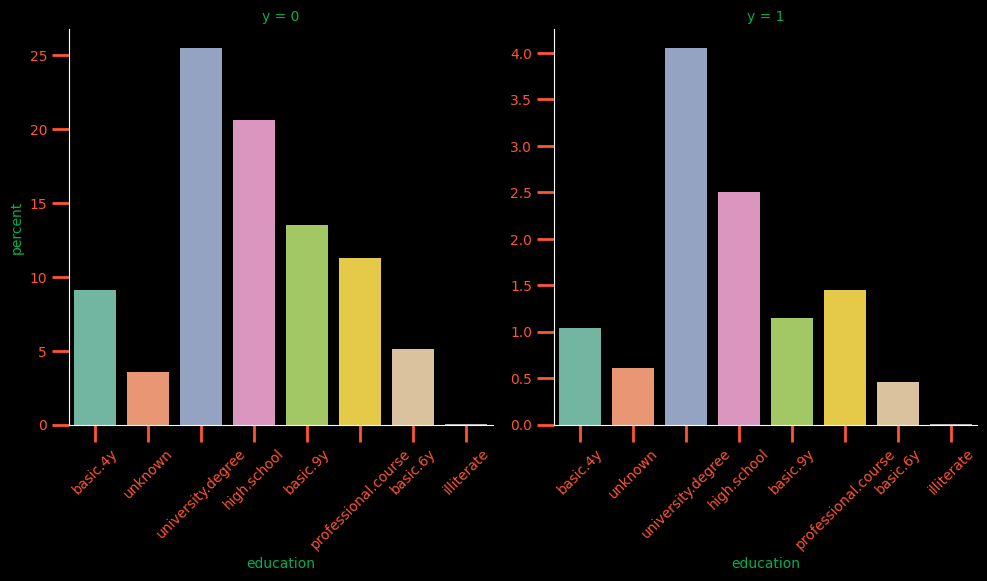

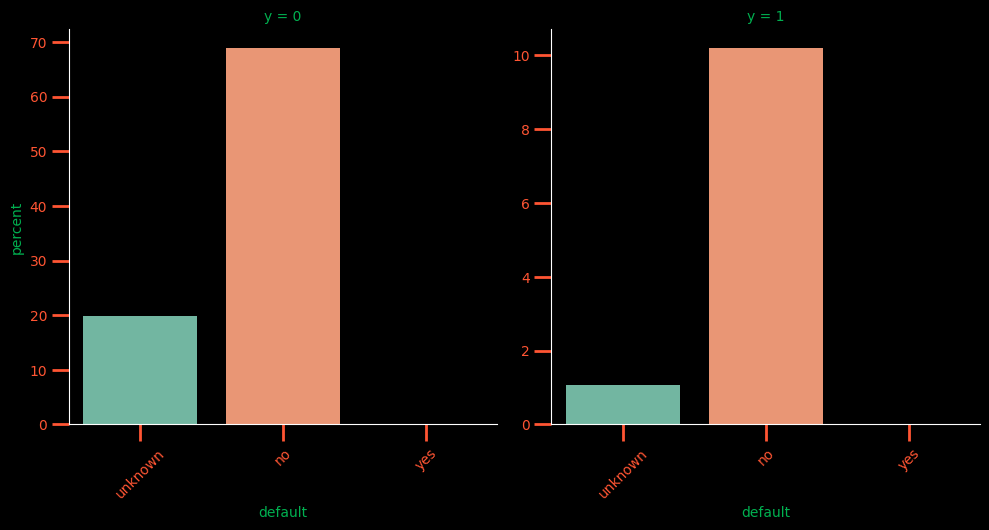

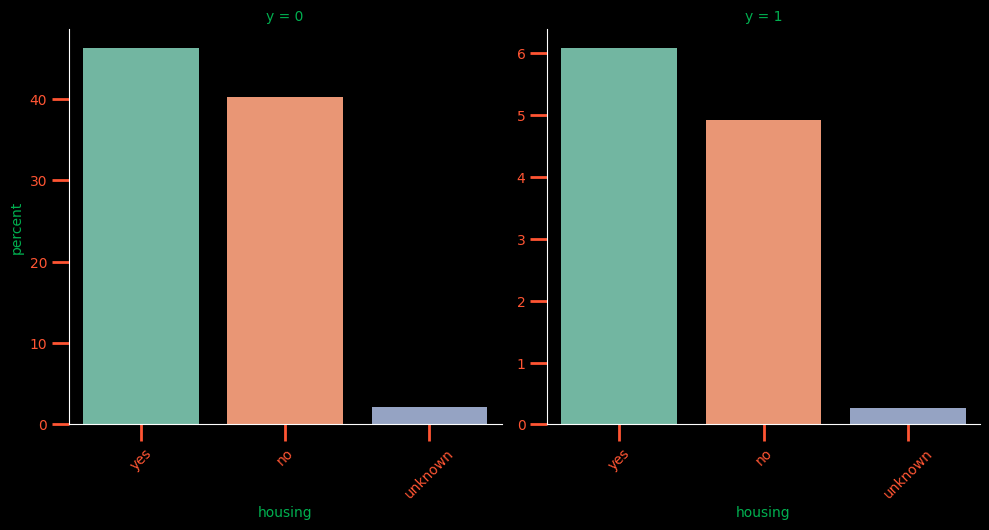

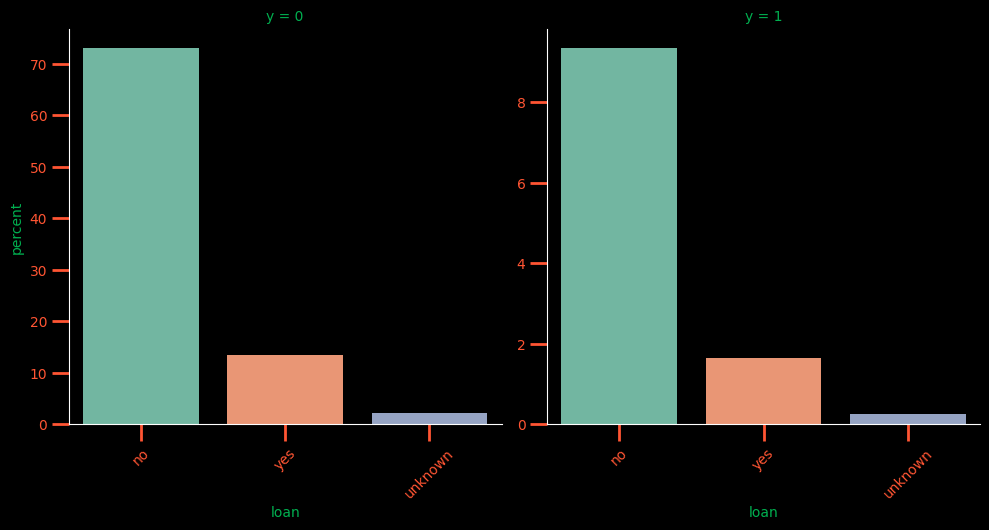

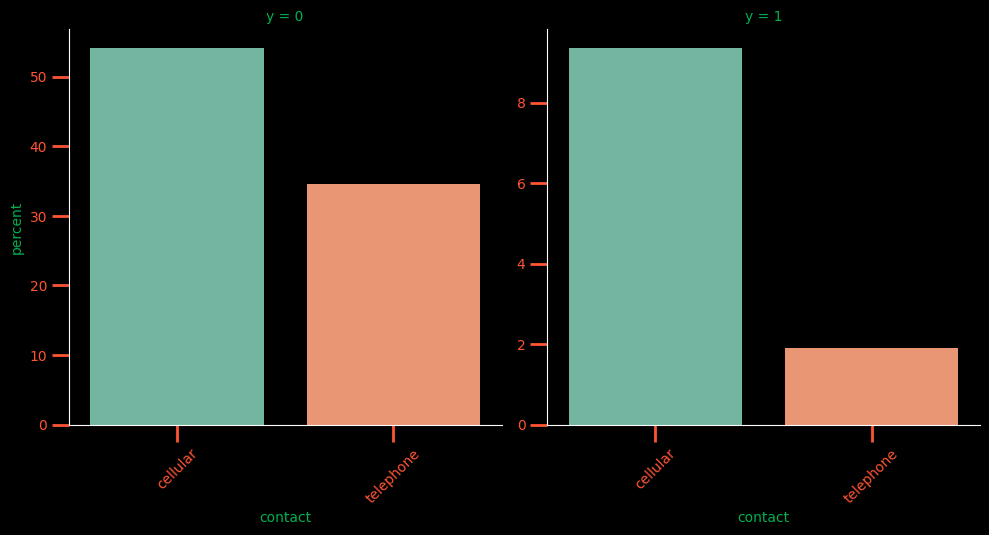

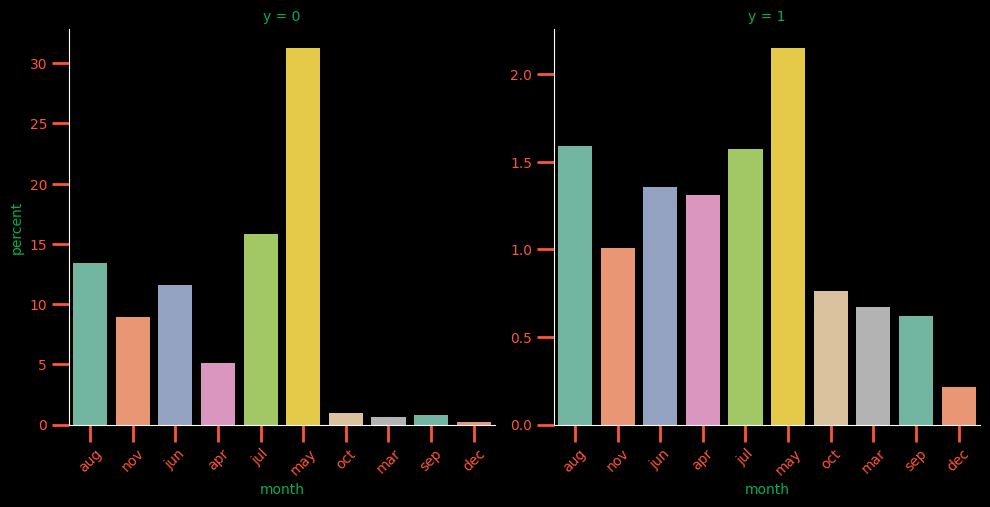

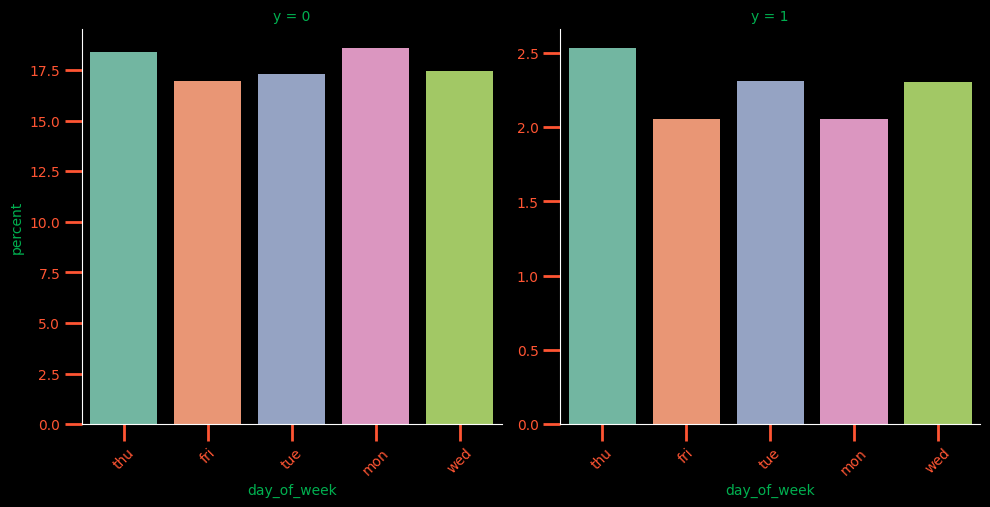

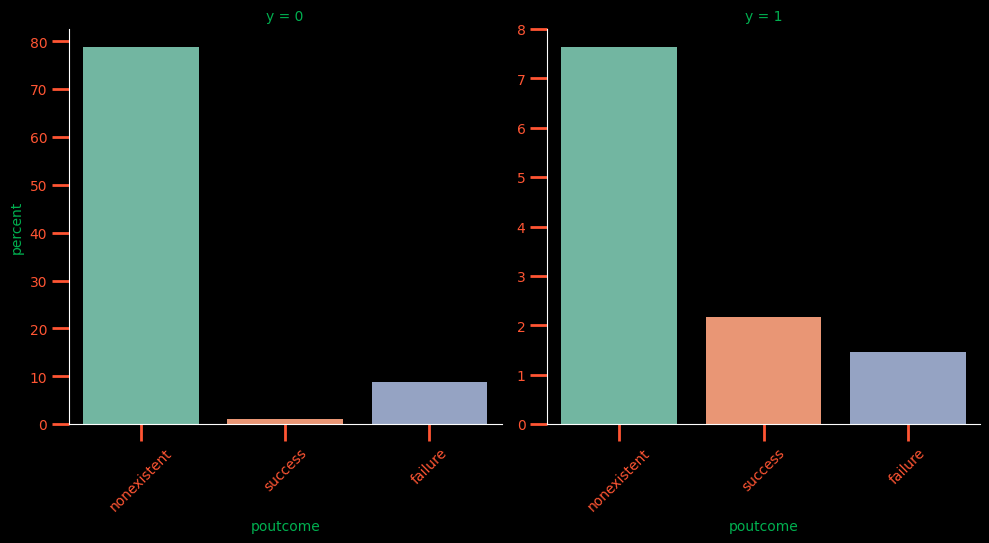

In [20]:
### Гистограммы распределений в разных классах

for col in categorical_columns:
    g = sns.catplot(x=col, kind='count', col='y', hue=col, data=df, palette='Set2', sharey=False, stat='percent')
    g.set_xticklabels(rotation=45)
    plt.show()

In [21]:
df = df.drop(['loan', 'housing', 'marital'], axis=1)
categorical_columns = categorical_columns.drop(['loan', 'housing', 'marital'])

In [22]:
df.head()

,age,job,education,default,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,nr_employed,y
0,44,blue-collar,basic.4y,unknown,cellular,aug,thu,1,999,0,nonexistent,93.444,-36.1,5228.1,0
1,53,technician,unknown,no,cellular,nov,fri,1,999,0,nonexistent,93.200,-42.0,5195.8,0
2,28,management,university.degree,no,cellular,jun,thu,3,6,2,success,94.055,-39.8,4991.6,1
3,39,services,high.school,no,cellular,apr,fri,2,999,0,nonexistent,93.075,-47.1,5099.1,0
4,55,retired,basic.4y,no,cellular,aug,fri,1,3,1,success,92.201,-31.4,5076.2,1


In [23]:
df.describe(include=object)

,job,education,default,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188
unique,12,8,3,2,10,5,3
top,admin.,university.degree,no,cellular,may,thu,nonexistent
freq,10422,12168,32588,26144,13769,8623,35563


In [24]:
for col in categorical_columns:

    if df[col].nunique() < 5:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

    else:
        mean_target = df.groupby(col)['y'].mean()
        df[col] = df[col].map(mean_target)

In [25]:
df

,age,job,education,month,day_of_week,campaign,pdays,previous,cons_price_idx,cons_conf_idx,nr_employed,y,default_unknown,default_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,44,0.068943,0.102490,0.106021,0.121188,1,999,0,93.444,-36.1,5228.1,0,True,False,False,True,False
1,53,0.108260,0.145003,0.101439,0.108087,1,999,0,93.200,-42.0,5195.8,0,False,False,False,True,False
2,28,0.112175,0.137245,0.105115,0.121188,3,6,2,94.055,-39.8,4991.6,1,False,False,False,False,True
3,39,0.081381,0.108355,0.204787,0.108087,2,999,0,93.075,-47.1,5099.1,0,False,False,False,True,False
4,55,0.252326,0.102490,0.106021,0.108087,1,3,1,92.201,-31.4,5076.2,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,0.252326,0.108355,0.105115,0.121188,1,999,0,94.465,-41.8,5228.1,0,True,False,True,True,False
41184,31,0.100000,0.102490,0.064347,0.121188,2,999,0,93.994,-36.4,5191.0,0,True,False,True,True,False
41185,42,0.129726,0.137245,0.064347,0.116671,3,999,0,93.994,-36.4,5191.0,0,True,False,True,True,False
41186,48,0.108260,0.113485,0.438719,0.117800,2,999,0,92.431,-26.9,5017.5,0,False,False,True,True,False


In [26]:
X = df.drop('y', axis=1)
Y = df['y']

In [27]:
### Обучим лоистическую регрессию

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    random_state=0,
                                                    test_size=0.2)

In [28]:
X_train.shape[0], X_test.shape[0]

(32950, 8238)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [30]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('LR', LogisticRegression(penalty=None))])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('LR', LogisticRegression(penalty=None))])

In [31]:
pipe.score(X_test, Y_test)

0.9013109978150037

In [32]:
print(pipe.classes_)

print(pipe.predict(X_test.head(1)))

print(pipe.predict_proba(X_test.head(1)))

print(pipe.decision_function(X_test.head(1)))

[0 1]
[0]
[[0.8814013 0.1185987]]
[-2.00576745]


In [33]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test, pipe.predict(X_test)).ravel()

print(f"True Negatice errors: {tn}")
print(f"False Positive errors: {fp}")
print(f"False Negative errors: {fn}")
print(f"True Positive errors: {tp}")


True Negatice errors: 7208
False Positive errors: 117
False Negative errors: 696
True Positive errors: 217


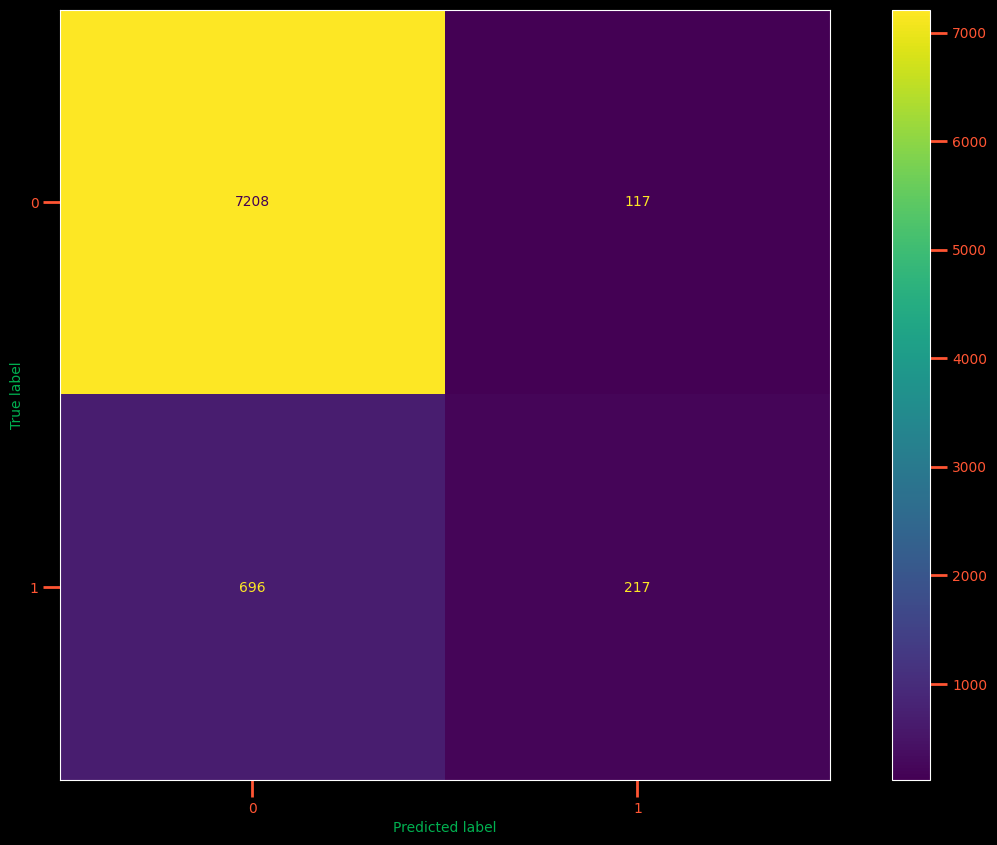

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, pipe.predict(X_test), labels=pipe.classes_)

cmp = ConfusionMatrixDisplay(confusion_matrix=cm)
fid, ax = plt.subplots(figsize=(16, 10))
cmp.plot(ax=ax)
plt.show()

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print(f"Accuracy равно: {accuracy_score(Y_test, pipe.predict(X_test)):.3f}")
print(f"Precision равно: {precision_score(Y_test, pipe.predict(X_test)):.3f}")
print(f"Recall равно: {recall_score(Y_test, pipe.predict(X_test)):.3f}")
print(f"F1 равно: {f1_score(Y_test, pipe.predict(X_test)):.3f}")

Accuracy равно: 0.901
Precision равно: 0.650
Recall равно: 0.238
F1 равно: 0.348


In [36]:
pipe.predict_proba(X_test.head(1))

array([[0.8814013, 0.1185987]])

In [37]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

(array([0.11082787, 0.11084133, 0.11085478, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00219058, 0.00109529,
        0.        ]),
 array([0.00292011, 0.00323579, 0.00434602, ..., 0.9046428 , 0.90522311,
        0.90809827]))

In [38]:
from sklearn.metrics import precision_recall_curve

# Получить вероятности принадлежности к каждому классу
probs = pipe.predict_proba(X_test)

# Вычислить precision, recall и thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, probs[:, 1])

# Создать DataFrame для анализа
tmp = pd.DataFrame({'precision': precision[:-1], 'recall': recall[:-1], 'threshold': thresholds})
tmp

,precision,recall,threshold
0,0.110828,1.000000,0.002920
1,0.110841,1.000000,0.003236
2,0.110855,1.000000,0.004346
3,0.110868,1.000000,0.005418
4,0.110882,1.000000,0.006514
...,...,...,...
7808,1.000000,0.005476,0.900211
7809,1.000000,0.004381,0.904127
7810,1.000000,0.003286,0.904643
7811,1.000000,0.002191,0.905223


### ROC/PR - кривые и AUC

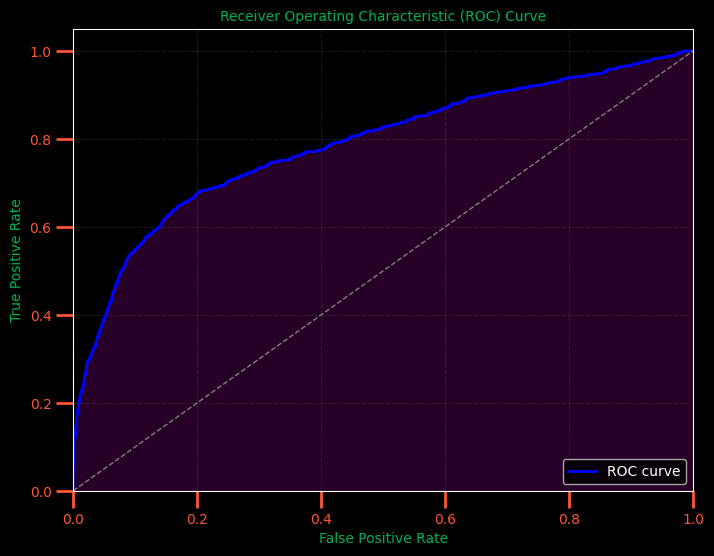

In [39]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Получение данных ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

# Построение ROC-кривой с настройками внешнего вида
plt.figure(figsize=(8, 6))  # Размер графика
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')  # Цвет, ширина линии и название кривой
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии
plt.xlim([0.0, 1.0])  # Пределы оси x
plt.ylim([0.0, 1.05])  # Пределы оси y
plt.xlabel('False Positive Rate')  # Подпись оси x
plt.ylabel('True Positive Rate')  # Подпись оси y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Название графика
plt.grid(True, alpha=0.1, linestyle="--")  # Включение сетки
plt.legend(loc="lower right")  # Расположение легенды

# Закраска площади под ROC-кривой
plt.fill_between(fpr, tpr, color='purple', alpha=0.3)

# Отображение графика
plt.show()

In [40]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.7856283713818973

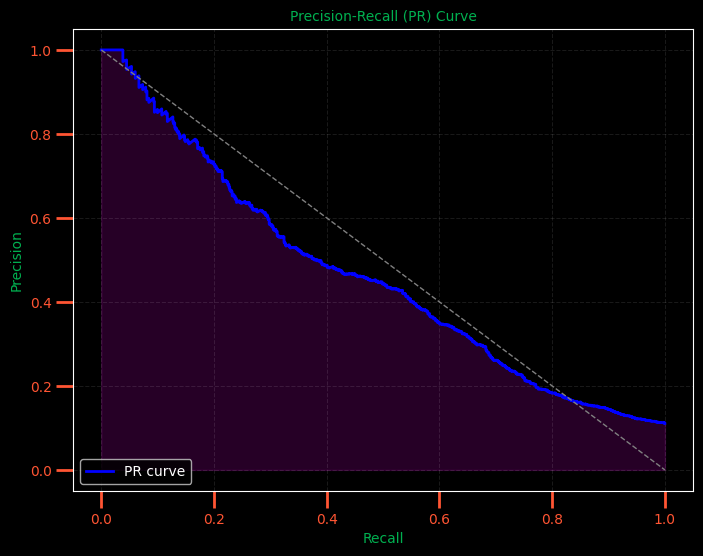

In [41]:
# PR-AUC - кривая

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(Y_test, pipe.predict_proba(X_test)[:, 1])

# Построение PR-кривой с помощью объекта PrecisionRecallDisplay
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)

# Построение PR-кривой с настройками внешнего вида
plt.figure(figsize=(8, 6))  # Размер графика
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')  # Цвет, ширина линии и название кривой
plt.plot([0, 1], [1, 0], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии
plt.xlabel('Recall')  # Подпись оси x
plt.ylabel('Precision')  # Подпись оси y
plt.title('Precision-Recall (PR) Curve')  # Название графика
plt.grid(True, alpha=0.1, linestyle="--")  # Включение сетки
plt.legend(loc="lower left")  # Расположение легенды

# Закраска площади под PR-кривой
plt.fill_between(recall, precision, color='purple', alpha=0.3)

# Отображение графика
plt.show()


In [42]:
auc(recall, precision)

0.46037880590796193

<Figure size 1000x800 with 0 Axes>

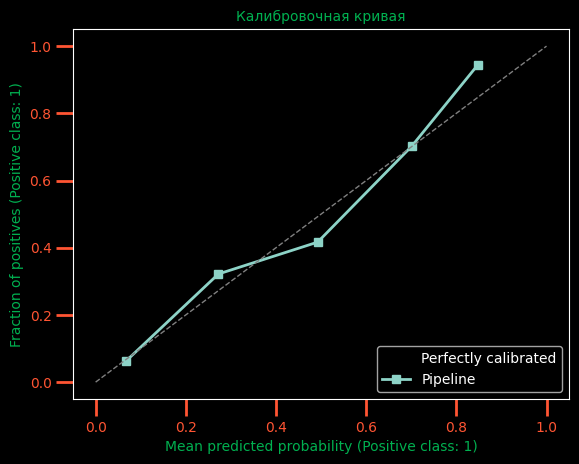

In [43]:
# Калибровочная кривая

from sklearn.calibration import CalibrationDisplay

fig = plt.figure()
fig.set_size_inches(10, 8)

CalibrationDisplay.from_estimator(pipe, X_test, Y_test)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии

plt.title('Калибровочная кривая')

plt.show()


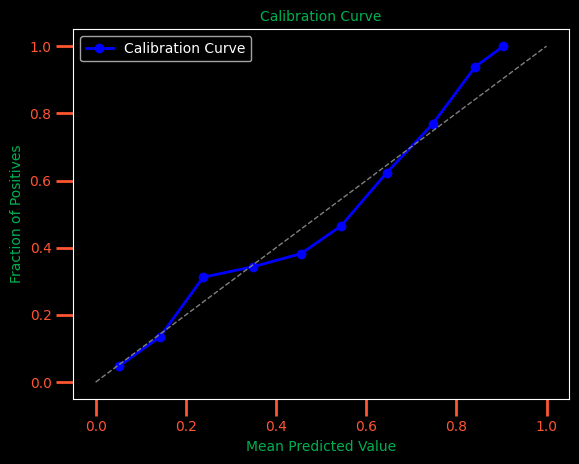

In [44]:
# Калибровочная кривая

from sklearn.calibration import calibration_curve

prob_pos = pipe.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, prob_pos, n_bins=10)

fig, ax = plt.subplots()
ax.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Calibration Curve', color='b')
ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии
ax.set_title('Calibration Curve')
ax.set_xlabel('Mean Predicted Value')
ax.set_ylabel('Fraction of Positives')
ax.legend()
plt.show()

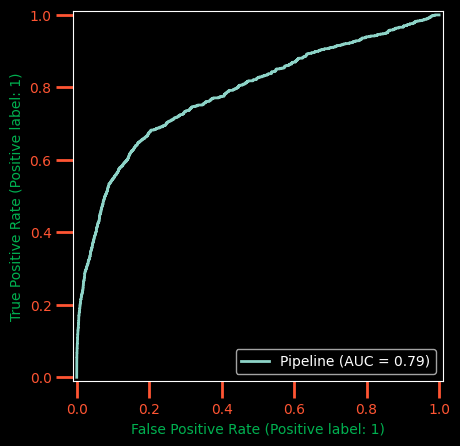

In [45]:
RocCurveDisplay.from_estimator(pipe, X_test, Y_test)

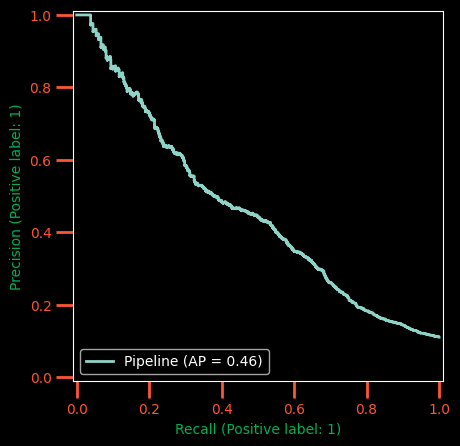

In [46]:
PrecisionRecallDisplay.from_estimator(pipe, X_test, Y_test)

In [47]:
df = pd.DataFrame(pipe.predict_proba(X_test), columns = ['0', '1'])
df

,0,1
0,0.881401,0.118599
1,0.905308,0.094692
2,0.971535,0.028465
3,0.965703,0.034297
4,0.928508,0.071492
...,...,...
8233,0.888827,0.111173
8234,0.950813,0.049187
8235,0.947084,0.052916
8236,0.961844,0.038156


### SVM

In [49]:
from sklearn.svm import LinearSVC

pipe_svm = Pipeline([
    ("scaler_svm", StandardScaler()),
    ("SVM", LinearSVC())
])

pipe_svm.fit(X_train, Y_train)

print(f"accuracy: {pipe_svm.score(X_test, Y_test)}")


E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_13\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy: 0.9025248846807478


E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_13\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print(f"Accuracy: \t {accuracy_score(Y_test, pipe_svm.predict(X_test)):.3f}")
print(f"Precision: \t {precision_score(Y_test, pipe_svm.predict(X_test)):.3f}")
print(f"Recall: \t {recall_score(Y_test, pipe_svm.predict(X_test)):.3f}")
print(f"F-score: \t {f1_score(Y_test, pipe_svm.predict(X_test)):.3f}")


Accuracy: 	 0.903
Precision: 	 0.688
Recall: 	 0.220
F-score: 	 0.334


<Figure size 1000x800 with 0 Axes>

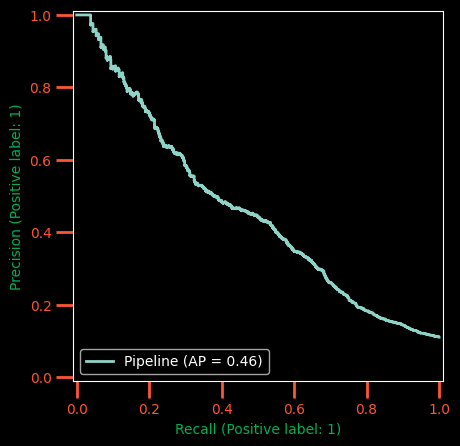

In [62]:
fig = plt.figure()
fig.set_size_inches(10, 8)

PrecisionRecallDisplay.from_estimator(pipe, X_test, Y_test)

plt.show()

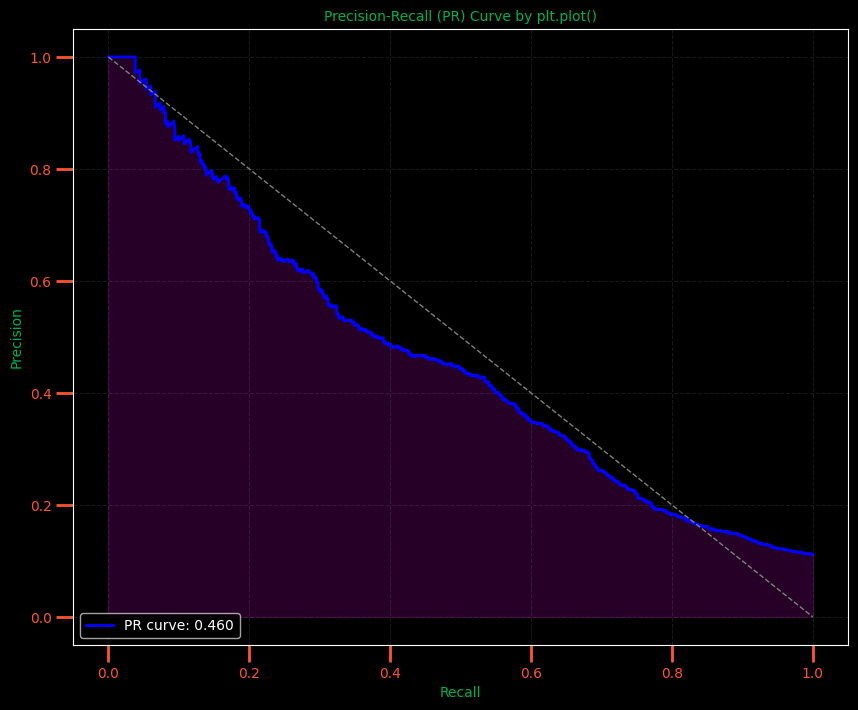

In [61]:
plt.figure(figsize=(10, 8))

plt.plot(recall, precision, color='blue', lw=2, label=f"PR curve: {auc(recall, precision):.3f}")
plt.plot([0, 1], [1, 0], color='gray', lw=1, linestyle='--')
plt.fill_between(recall, precision, color='purple', alpha=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve by plt.plot()')
plt.grid(True, alpha=0.1, linestyle="--")
plt.legend(loc="lower left")

plt.show()

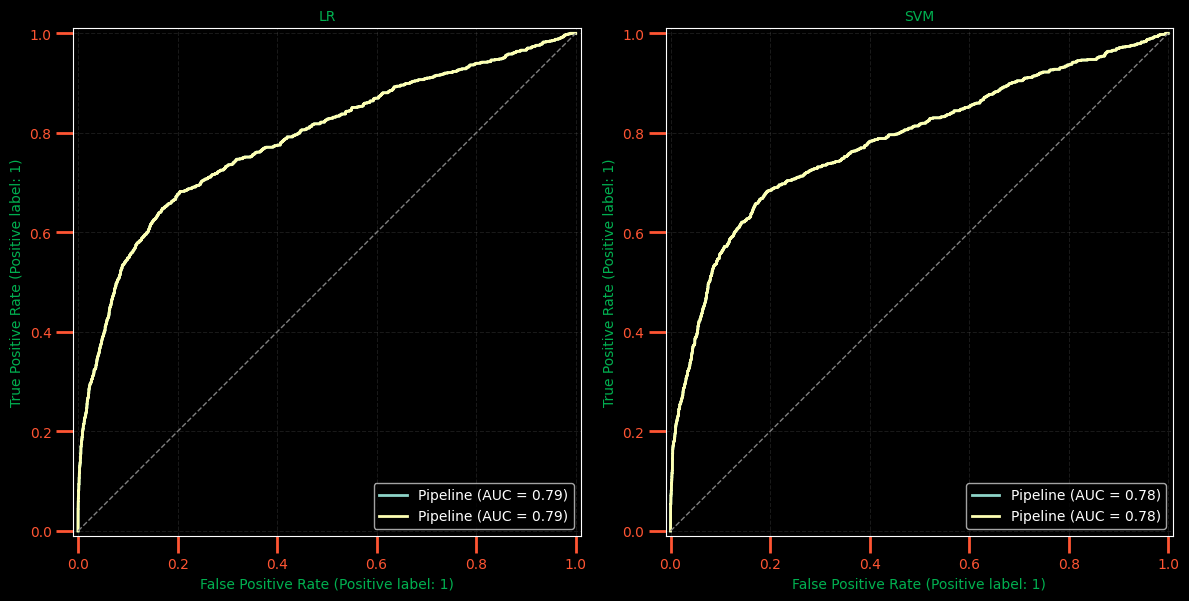

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График ROC-кривой для модели логистической регрессии (LR)
ax = axes[0]
roc_display_lr = RocCurveDisplay.from_estimator(pipe, X_test, Y_test, ax=ax)
roc_display_lr.plot(ax=ax)
ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
ax.grid(True, alpha=0.1, linestyle="--")
ax.set_title("LR")

# График ROC-кривой для модели опорных векторов (SVM)
ax = axes[1]
roc_display_svm = RocCurveDisplay.from_estimator(pipe_svm, X_test, Y_test, ax=ax)
roc_display_svm.plot(ax=ax)
ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
ax.grid(True, alpha=0.1, linestyle="--")
ax.set_title("SVM")

plt.tight_layout()
plt.show()

In [85]:
### Преобразуем выходы модели в вероятности для построения калибровочной кривой для SVM (так как SVM не рассчитывает вероятности принадлежности объектов к классам)

pipe_svm.decision_function(X_test.head(2)) ### Отсуп M

def sigmoid (output):
    return 1 / (1 + np.exp(-output))

pred_prob = sigmoid(pipe_svm.decision_function(X_test))
pred_prob

array([0.33494166, 0.31862719, 0.26029948, ..., 0.27601029, 0.2862028 ,
       0.23230489])

In [78]:
min(pred_prob), max(pred_prob)

(0.21992670429337943, 0.7005198338391493)

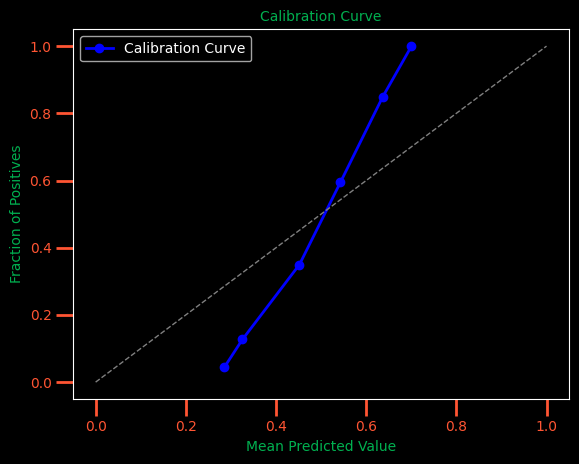

In [81]:
# Калибровочная кривая

from sklearn.calibration import calibration_curve

prob_pos = sigmoid(pipe_svm.decision_function(X_test))
fraction_of_positives, mean_predicted_value = calibration_curve(Y_test, prob_pos, n_bins=10)

fig, ax = plt.subplots()
ax.plot(mean_predicted_value, fraction_of_positives, marker='o', label='Calibration Curve', color='b')
ax.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии
ax.set_title('Calibration Curve')
ax.set_xlabel('Mean Predicted Value')
ax.set_ylabel('Fraction of Positives')
ax.legend()
plt.show()

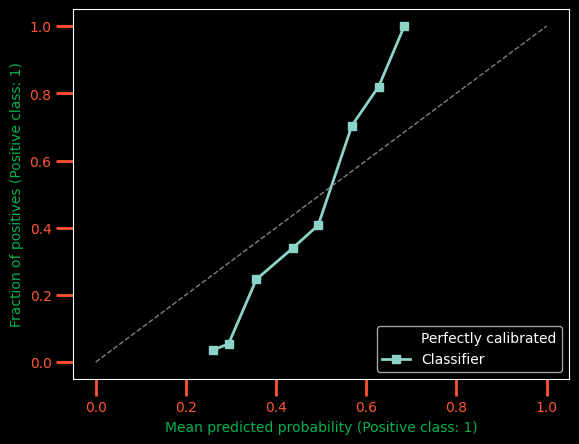

In [84]:
CalibrationDisplay.from_predictions(Y_test, pred_prob, n_bins=15)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии

In [86]:
### Калибровка Платта

from sklearn.calibration import CalibratedClassifierCV

calibration = CalibratedClassifierCV(pipe_svm, cv=5, method='sigmoid')

calibration.fit(X_train, Y_train)

calibration_probs = calibration.predict_proba(X_test)[:, 1]


E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_13\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_13\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_13\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\Рабочий стол С\python_projects\carpov_courses_python\machine_learning\less_13\venv\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to conv

In [87]:
calibration_probs

array([0.11211628, 0.09078085, 0.03856386, ..., 0.04925454, 0.05739796,
       0.02411591])

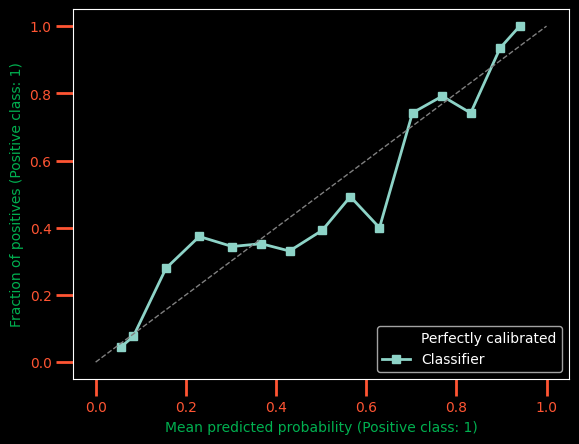

In [89]:
CalibrationDisplay.from_predictions(Y_test, calibration_probs, n_bins=15)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Добавление диагональной пунктирной линии

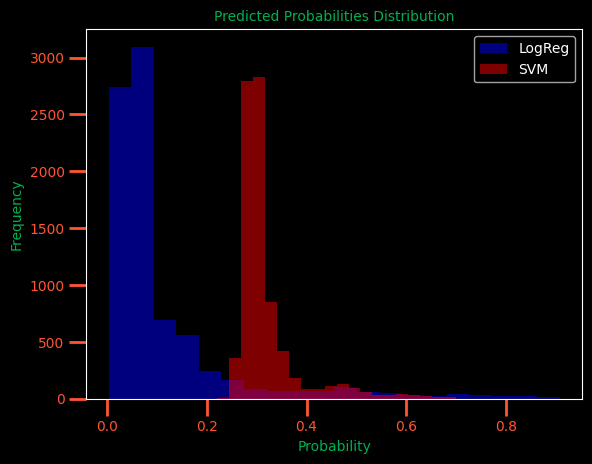

In [100]:
# Получение вероятностей предсказаний для модели логистической регрессии
probs_logreg = pipe.predict_proba(X_test)[:, 1]

# Получение вероятностей предсказаний для модели опорных векторов
probs_svm = sigmoid(pipe_svm.decision_function(X_test))

# Построение гистограммы вероятностей для модели логистической регрессии
plt.hist(probs_logreg, bins=20, alpha=0.5, color='blue', label='LogReg')

# Построение гистограммы вероятностей для модели опорных векторов
plt.hist(probs_svm, bins=20, alpha=0.5, color='red', label='SVM')

plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probabilities Distribution')
plt.legend()
plt.show()